# CIFAR-10 분류

- 유명한 CIFAR-10 데이터 세트를 분류하여 CNN을 적용하려고 한다.
- 10가지의 클래스로 나누는데: 
    - 비행기
    - 자동차
    - 새
    - 고양이
    - 사슴
    - 개
    - 개구리
    - 말
    - 배
    - 트럭

- 출처: https://www.cs.toronto.edu/~kriz/cifar.html


# 목차

1. 데이터 읽기
2. 데이터 시각화
3. 모델 훈련
4. 모델 평가
5. 결론

# 데이터 읽기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import warnings
warnings.filterwarnings('ignore')

In [2]:
from keras.datasets import cifar10
(X_train,y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 357s 2us/step


In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

# 데이터 시각화

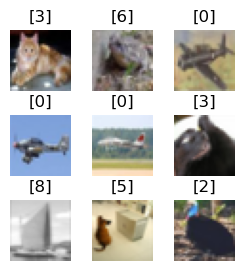

In [8]:
W_grid = 3
L_grid = 3

fig, axes = plt.subplots(L_grid, W_grid, figsize = (3,3))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # 0 ~50000 랜덤 뽑기
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index]) # 클래스 숫자 부여
    axes[i].axis('off') # x,y축 제거
plt.subplots_adjust(hspace=0.4)

모델을 훈련하기 전에 데이터를 정리한다.

In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [10]:
# 클래스가 10개
number_cat = 10

In [11]:
# 범주형으로 표현
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)
y_test = keras.utils.to_categorical(y_test, number_cat)

In [12]:
# 0~1로 데이터 정규화
X_train = X_train/255
X_test = X_test/255
Input_shape = X_train.shape[1:]

# 모델 훈련하기

In [13]:
from keras.models import Sequential
# 좌에서 우로 순차적으로 설계 합성곱 설계 후 맥스 푸링을 하고 ReLU 활성 함수를 적용, 완전 연결 인공신경망 설계
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
# 합성곱프로세스 실행,다운 샘픞링이나 서브 샘플링: 맥스 풀링은 이미지의 차원 수를 줄이고 실제 특징 압축
# 픽셀의 평균값 드롭아웃은 정규화
from keras.optimizers import Adam
# 최적화 후 신경망의 가중치
from keras.callbacks import TensorBoard

In [14]:
# 합성곱층 설계하기
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))


cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024, activation = 'relu'))
cnn_model.add(Dense(units = 1024, activation = 'relu'))
cnn_model.add(Dense(units = 10, activation = 'softmax')) # 0,1이 출력되어야하기 때문에 softmax 사용

In [15]:
from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers

cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.RMSprop(lr = 0.001), metrics = ['accuracy'])

정확도를 계산해보자

In [16]:
score = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 2, shuffle = True)

Epoch 1/2
1563/1563 [==============================] - 288s 183ms/step - loss: 1.6221 - accuracy: 0.4133
Epoch 2/2
1563/1563 [==============================] - 272s 174ms/step - loss: 1.1589 - accuracy: 0.5962


# 모델 평가

참값 vs 예측값을 도출해본다.

In [17]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 8s 24ms/step - loss: 1.0130 - accuracy: 0.6458
Test Accuracy: 0.645799994468689


In [18]:
predicted = cnn_model.predict(X_test) 
predicted_classes = predicted.argmax(axis=-1)
predicted_classes

313/313 [==============================] - 8s 24ms/step


array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [19]:
y_test = y_test.argmax(1)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

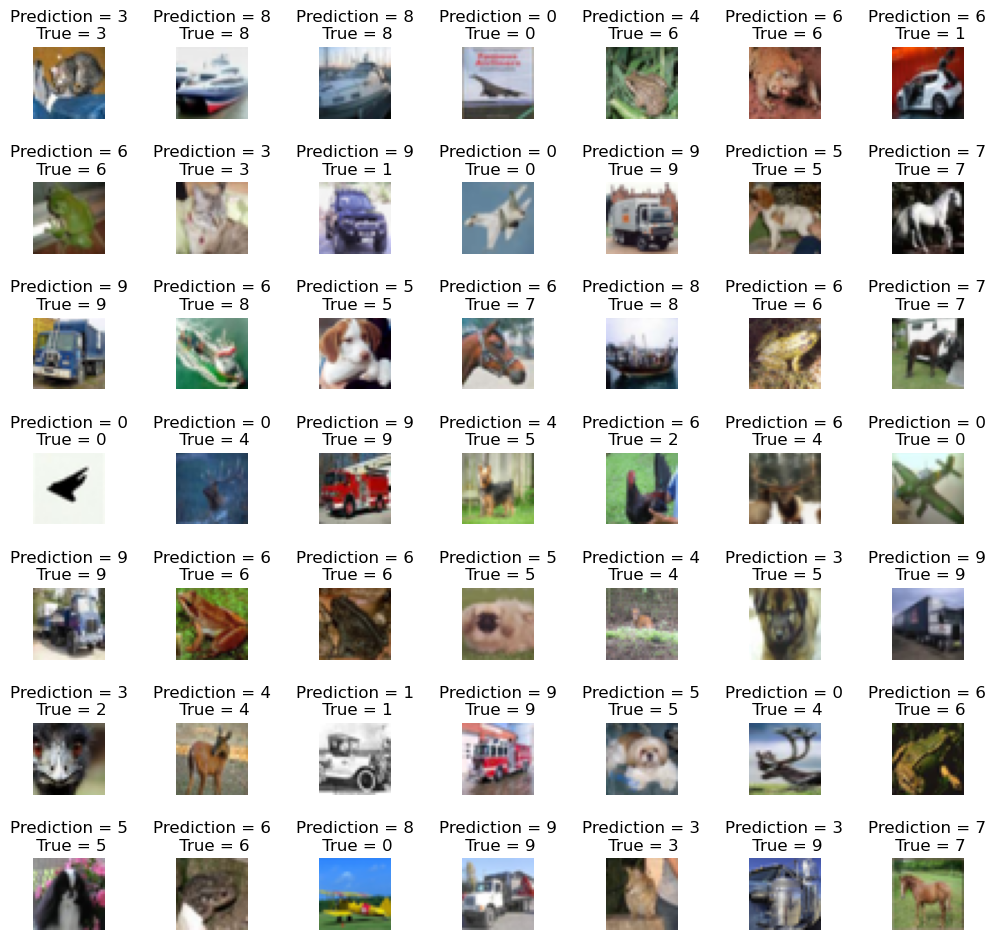

In [20]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

<AxesSubplot:>

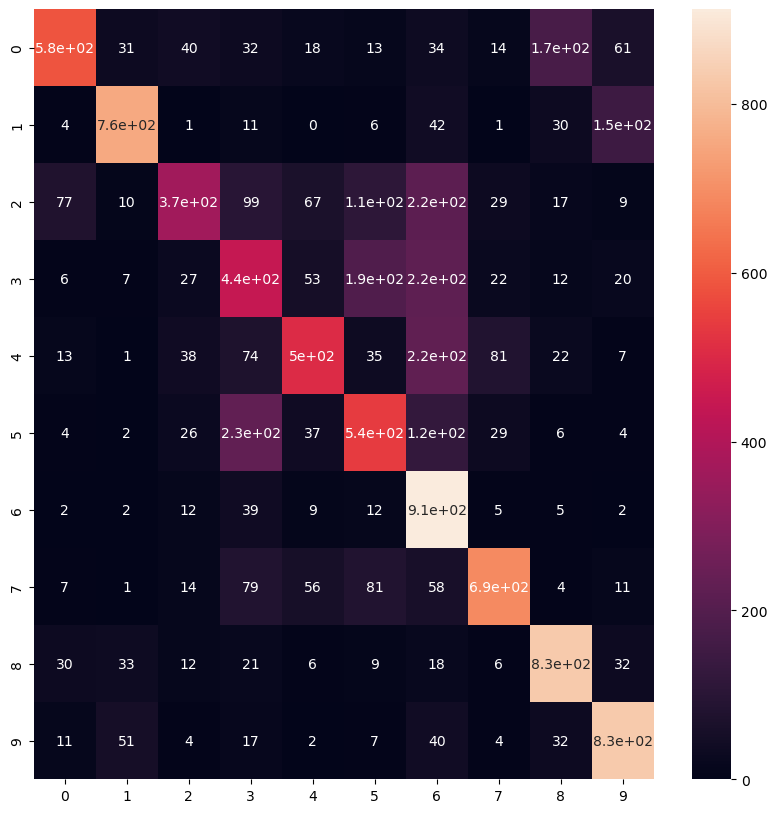

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

# 결론

생각보다 예측값이 낮아서 놀랐다. 합성곱층과 뉴런 수를 늘려서 했지만 크게 향상 되지 않았다.